In [1]:
import requests
from dotenv import load_dotenv
import yfinance as yf
import hvplot.pandas
import alpaca_trade_api as tradeapi
import pandas as pd
import numpy as np
import seaborn as sns
import panel as pn
import panel.widgets as pnw

In [2]:
load_dotenv()

True

In [3]:
def tickerGrab(ticker, period="5y"):
    symbol = yf.Ticker(ticker)
    symbol_hist = symbol.history(period=period)
    symbol_hist = symbol_hist.drop(["Dividends","Stock Splits"],axis = 1)
    symbol_hist.to_csv(f"{ticker}_hist.csv")
    return symbol_hist

In [4]:
ticker_list = ['^GSPC','^IXIC','MSCI','ETH-USD','BCH-USD','BTC-USD','ADA-USD','DASH-USD','LTC-USD']

In [5]:
def tickerListGrab(ticker_list, period="5y"):
    #create empty DataFrame
    df_price = pd.DataFrame()
    df_return = pd.DataFrame()
    #loop through list
    for ticker in ticker_list:
        out = [0]
        # get data from Yahoo Finance
        symbol = yf.Ticker(ticker)
        symbol_hist = symbol.history(period=period)
        # drop unnecessary columns
        symbol_hist = symbol_hist.drop(["Dividends","Stock Splits"],axis = 1)
        # drop NA
        symbol_hist = symbol_hist.dropna()
        # sort data by Date(ascending)
        symbol_hist = symbol_hist.sort_index(ascending=True)
        # calculate return for each symbol
        for i in range(len(symbol_hist)-1):
            out.append((symbol_hist['Close'][i+1]-symbol_hist['Close'][i])/symbol_hist['Close'][i])
        symbol_hist['Return'] = out
        # labeling
#        symbol_hist['Name'] = ticker
        # append to the main DataFrame
        df_price = pd.concat([df_price,symbol_hist['Close']],axis=1)
        df_return = pd.concat([df_return,symbol_hist['Return']],axis=1)
        df_price = df_price.rename(columns={'Close':ticker+'_Close'})
        df_return = df_return.rename(columns={'Return':ticker+'_Return'})
        #df_price = df_price.sort_index(ascending=False)
        #df_return = df_return.sort_index(ascending=False)
#        symbol_hist.to_csv(f"{ticker}_hist.csv")
        # dropna
    df_price = df_price.dropna()
    df_return = df_return.dropna()
    return df_price,df_return

In [6]:
df_price,df_return = tickerListGrab(ticker_list)

In [7]:
df_price.tail()

^GSPC_Close   ^IXIC_Close  MSCI_Close  ETH-USD_Close  \
2021-05-24 00:00:00  4197.049805  13661.169922  462.850006    2643.591064   
2021-05-25 00:00:00  4188.129883  13657.169922  464.609985    2706.628906   
2021-05-26 00:00:00  4195.990234  13738.000000  465.100006    2888.698730   
2021-05-27 00:00:00  4200.879883  13736.280273  464.369995    2736.488525   
2021-05-28 00:00:00  4204.109863  13748.740234  468.130005    2419.906250   

                     BCH-USD_Close  BTC-USD_Close  ADA-USD_Close  \
2021-05-24 00:00:00     748.421692   38705.980469       1.549485   
2021-05-25 00:00:00     719.947815   38402.222656       1.555369   
2021-05-26 00:00:00     765.048828   39294.199219       1.782702   
2021-05-27 00:00:00     745.955078   38436.968750       1.645960   
2021-05-28 00:00:00     689.947876   35697.605469       1.511987   

                     DASH-USD_Close  LTC-USD_Close  
2021-05-24 00:00:00      199.952576     183.994125  
2021-05-25 00:00:00      195.235168     183.497894  
2021-05-26 00:00:00      214.202271     199.224335  
2021-05-27 00:00:00      203.325684     193.121094  
2021-05-28 00:00:00      183.186523     177.320663

In [8]:
df_price.head()

^GSPC_Close  ^IXIC_Close  MSCI_Close  ETH-USD_Close  \
2017-10-02 00:00:00  2529.120117  6516.720215  112.523842     297.475006   
2017-10-03 00:00:00  2534.580078  6531.709961  113.995552     292.463013   
2017-10-04 00:00:00  2537.739990  6534.629883  115.563446     292.657990   
2017-10-05 00:00:00  2552.070068  6585.359863  116.486870     295.863007   
2017-10-06 00:00:00  2549.330078  6590.180176  116.660034     308.588013   

                     BCH-USD_Close  BTC-USD_Close  ADA-USD_Close  \
2017-10-02 00:00:00     421.186005    4409.319824       0.025932   
2017-10-03 00:00:00     404.177002    4317.479980       0.020816   
2017-10-04 00:00:00     358.446991    4229.359863       0.021931   
2017-10-05 00:00:00     355.750000    4328.410156       0.021489   
2017-10-06 00:00:00     363.014008    4370.810059       0.018539   

                     DASH-USD_Close  LTC-USD_Close  
2017-10-02 00:00:00      308.684998      53.375999  
2017-10-03 00:00:00      296.234985      52.349602  
2017-10-04 00:00:00      305.457001      51.399502  
2017-10-05 00:00:00      305.398987      51.669498  
2017-10-06 00:00:00      306.878998      52.120098

In [9]:
df_return.head()

^GSPC_Return  ^IXIC_Return  MSCI_Return  ETH-USD_Return  \
2017-10-02 00:00:00      0.003874      0.003196     0.000685       -0.016081   
2017-10-03 00:00:00      0.002159      0.002300     0.013079       -0.016848   
2017-10-04 00:00:00      0.001247      0.000447     0.013754        0.000667   
2017-10-05 00:00:00      0.005647      0.007763     0.007991        0.010951   
2017-10-06 00:00:00     -0.001074      0.000732     0.001487        0.043010   

                     BCH-USD_Return  BTC-USD_Return  ADA-USD_Return  \
2017-10-02 00:00:00        0.014534        0.001267        0.038568   
2017-10-03 00:00:00       -0.040384       -0.020829       -0.197285   
2017-10-04 00:00:00       -0.113144       -0.020410        0.053565   
2017-10-05 00:00:00       -0.007524        0.023420       -0.020154   
2017-10-06 00:00:00        0.020419        0.009796       -0.137280   

                     DASH-USD_Return  LTC-USD_Return  
2017-10-02 00:00:00        -0.022536       -0.021401  
2017-10-03 00:00:00        -0.040332       -0.019230  
2017-10-04 00:00:00         0.031131       -0.018149  
2017-10-05 00:00:00        -0.000190        0.005253  
2017-10-06 00:00:00         0.004846        0.008721

In [10]:
df_price.hvplot.line(title = 'Index and Crypto Price')

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [11]:
df_return.hvplot.line(title = 'Index and Crypto Return')

:NdOverlay   [Variable]
   :Curve   [index]   (value)

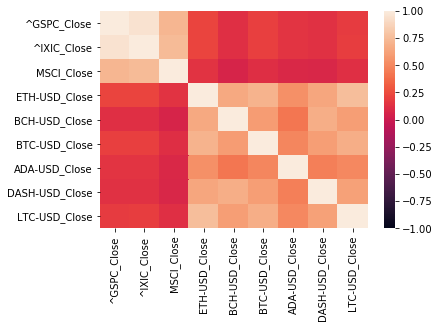

In [12]:
heat = df_price.pct_change().corr()
sns.heatmap(heat, vmin=-1, vmax=1)

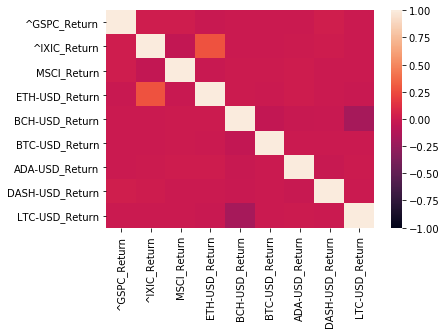

In [13]:
heat = df_return.pct_change().corr()
sns.heatmap(heat, vmin=-1, vmax=1)

In [14]:
annual_returns = df_price.pct_change().mean()*252
annual_returns

^GSPC_Close       0.163563
^IXIC_Close       0.235209
MSCI_Close        0.454079
ETH-USD_Close     1.100484
BCH-USD_Close     1.018864
BTC-USD_Close     0.890065
ADA-USD_Close     2.318543
DASH-USD_Close    0.521844
LTC-USD_Close     0.922562
dtype: float64

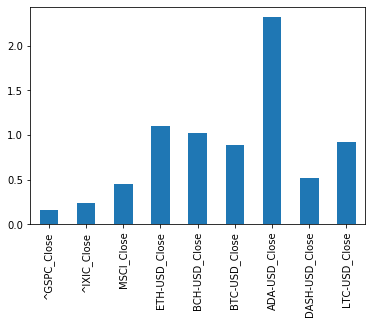

In [15]:
annual_returns.plot(kind = 'bar')

In [16]:
daily_returns = df_price.pct_change()

In [17]:
#rolling volatility 
##crypto looks like a roller-coaster.

daily_returns.rolling(200).std() * np.sqrt(200)
daily_returns.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [18]:
daily_returns.head()

^GSPC_Close  ^IXIC_Close  MSCI_Close  ETH-USD_Close  \
2017-10-02 00:00:00          NaN          NaN         NaN            NaN   
2017-10-03 00:00:00     0.002159     0.002300    0.013079      -0.016848   
2017-10-04 00:00:00     0.001247     0.000447    0.013754       0.000667   
2017-10-05 00:00:00     0.005647     0.007763    0.007991       0.010951   
2017-10-06 00:00:00    -0.001074     0.000732    0.001487       0.043010   

                     BCH-USD_Close  BTC-USD_Close  ADA-USD_Close  \
2017-10-02 00:00:00            NaN            NaN            NaN   
2017-10-03 00:00:00      -0.040384      -0.020829      -0.197285   
2017-10-04 00:00:00      -0.113144      -0.020410       0.053565   
2017-10-05 00:00:00      -0.007524       0.023420      -0.020154   
2017-10-06 00:00:00       0.020419       0.009796      -0.137280   

                     DASH-USD_Close  LTC-USD_Close  
2017-10-02 00:00:00             NaN            NaN  
2017-10-03 00:00:00       -0.040332      -0.019230  
2017-10-04 00:00:00        0.031131      -0.018149  
2017-10-05 00:00:00       -0.000190       0.005253  
2017-10-06 00:00:00        0.004846       0.008721

In [27]:
name = pnw.MultiSelect(options=list(daily_returns.columns.values))
ax = daily_returns.hvplot.hist(y=name,bins=75,alpha=0.6,bin_range=(-0.5, 1.5),ylim=(0,800))
pn.Row(pn.WidgetBox(name), ax)

Row
    [0] WidgetBox
        [0] MultiSelect(options=['^GSPC_Close', ...])
    [1] ParamFunction(function)

In [20]:
daily_returns.hvplot.box()
# Delete

:BoxWhisker   [Variable]   (value)

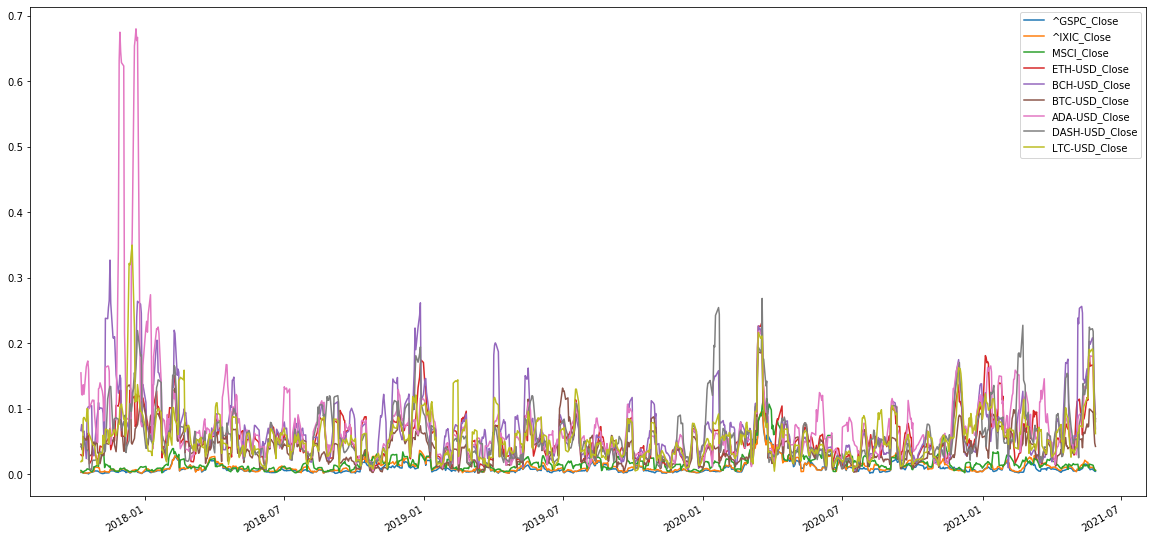

In [33]:
daily_returns.rolling(5).std().plot(figsize=(20,10))
#Add sliding variable? (Days)

In [22]:
#response to it? That is one way to think about covariance. Let’s see their annual covariance.
#annual covariance
annual_cov = daily_returns.cov() * 252
annual_cov

^GSPC_Close  ^IXIC_Close  MSCI_Close  ETH-USD_Close  \
^GSPC_Close        0.047128     0.050042    0.055419       0.049286   
^IXIC_Close        0.050042     0.059103    0.063540       0.055574   
MSCI_Close         0.055419     0.063540    0.123650       0.050627   
ETH-USD_Close      0.049286     0.055574    0.050627       1.039881   
BCH-USD_Close      0.038150     0.041254    0.033016       0.908693   
BTC-USD_Close      0.033438     0.038659    0.033742       0.567772   
ADA-USD_Close      0.057793     0.064852    0.054451       0.968098   
DASH-USD_Close     0.035053     0.039357    0.033948       0.761402   
LTC-USD_Close      0.044759     0.052050    0.049609       0.865622   

                BCH-USD_Close  BTC-USD_Close  ADA-USD_Close  DASH-USD_Close  \
^GSPC_Close          0.038150       0.033438       0.057793        0.035053   
^IXIC_Close          0.041254       0.038659       0.064852        0.039357   
MSCI_Close           0.033016       0.033742       0.054451        0.033948   
ETH-USD_Close        0.908693       0.567772       0.968098        0.761402   
BCH-USD_Close        1.824114       0.632833       0.995466        1.074220   
BTC-USD_Close        0.632833       0.620738       0.682026        0.554753   
ADA-USD_Close        0.995466       0.682026       3.036673        0.946130   
DASH-USD_Close       1.074220       0.554753       0.946130        1.356360   
LTC-USD_Close        0.913908       0.601849       0.983768        0.803452   

                LTC-USD_Close  
^GSPC_Close          0.044759  
^IXIC_Close          0.052050  
MSCI_Close           0.049609  
ETH-USD_Close        0.865622  
BCH-USD_Close        0.913908  
BTC-USD_Close        0.601849  
ADA-USD_Close        0.983768  
DASH-USD_Close       0.803452  
LTC-USD_Close        1.237343

In [23]:
daily_returns.corr()

^GSPC_Close  ^IXIC_Close  MSCI_Close  ETH-USD_Close  \
^GSPC_Close        1.000000     0.948186    0.725979       0.222634   
^IXIC_Close        0.948186     1.000000    0.743273       0.224167   
MSCI_Close         0.725979     0.743273    1.000000       0.141187   
ETH-USD_Close      0.222634     0.224167    0.141187       1.000000   
BCH-USD_Close      0.130115     0.125642    0.069518       0.659780   
BTC-USD_Close      0.195502     0.201833    0.121793       0.706689   
ADA-USD_Close      0.152771     0.153080    0.088861       0.544789   
DASH-USD_Close     0.138644     0.139004    0.082896       0.641113   
LTC-USD_Close      0.185351     0.192473    0.126830       0.763118   

                BCH-USD_Close  BTC-USD_Close  ADA-USD_Close  DASH-USD_Close  \
^GSPC_Close          0.130115       0.195502       0.152771        0.138644   
^IXIC_Close          0.125642       0.201833       0.153080        0.139004   
MSCI_Close           0.069518       0.121793       0.088861        0.082896   
ETH-USD_Close        0.659780       0.706689       0.544789        0.641113   
BCH-USD_Close        1.000000       0.594715       0.422962        0.682935   
BTC-USD_Close        0.594715       1.000000       0.496761        0.604586   
ADA-USD_Close        0.422962       0.496761       1.000000        0.466191   
DASH-USD_Close       0.682935       0.604586       0.466191        1.000000   
LTC-USD_Close        0.608319       0.686734       0.507515        0.620194   

                LTC-USD_Close  
^GSPC_Close          0.185351  
^IXIC_Close          0.192473  
MSCI_Close           0.126830  
ETH-USD_Close        0.763118  
BCH-USD_Close        0.608319  
BTC-USD_Close        0.686734  
ADA-USD_Close        0.507515  
DASH-USD_Close       0.620194  
LTC-USD_Close        1.000000

In [24]:
#annual covariance
annual_cov = daily_returns.cov() * 252
annual_cov

^GSPC_Close  ^IXIC_Close  MSCI_Close  ETH-USD_Close  \
^GSPC_Close        0.047128     0.050042    0.055419       0.049286   
^IXIC_Close        0.050042     0.059103    0.063540       0.055574   
MSCI_Close         0.055419     0.063540    0.123650       0.050627   
ETH-USD_Close      0.049286     0.055574    0.050627       1.039881   
BCH-USD_Close      0.038150     0.041254    0.033016       0.908693   
BTC-USD_Close      0.033438     0.038659    0.033742       0.567772   
ADA-USD_Close      0.057793     0.064852    0.054451       0.968098   
DASH-USD_Close     0.035053     0.039357    0.033948       0.761402   
LTC-USD_Close      0.044759     0.052050    0.049609       0.865622   

                BCH-USD_Close  BTC-USD_Close  ADA-USD_Close  DASH-USD_Close  \
^GSPC_Close          0.038150       0.033438       0.057793        0.035053   
^IXIC_Close          0.041254       0.038659       0.064852        0.039357   
MSCI_Close           0.033016       0.033742       0.054451        0.033948   
ETH-USD_Close        0.908693       0.567772       0.968098        0.761402   
BCH-USD_Close        1.824114       0.632833       0.995466        1.074220   
BTC-USD_Close        0.632833       0.620738       0.682026        0.554753   
ADA-USD_Close        0.995466       0.682026       3.036673        0.946130   
DASH-USD_Close       1.074220       0.554753       0.946130        1.356360   
LTC-USD_Close        0.913908       0.601849       0.983768        0.803452   

                LTC-USD_Close  
^GSPC_Close          0.044759  
^IXIC_Close          0.052050  
MSCI_Close           0.049609  
ETH-USD_Close        0.865622  
BCH-USD_Close        0.913908  
BTC-USD_Close        0.601849  
ADA-USD_Close        0.983768  
DASH-USD_Close       0.803452  
LTC-USD_Close        1.237343

In [25]:
daily_returns.ewm(halflife=21).mean().head(20)

^GSPC_Close  ^IXIC_Close  MSCI_Close  ETH-USD_Close  \
2017-10-02 00:00:00          NaN          NaN         NaN            NaN   
2017-10-03 00:00:00     0.002159     0.002300    0.013079      -0.016848   
2017-10-04 00:00:00     0.001695     0.001358    0.013422      -0.007946   
2017-10-05 00:00:00     0.003056     0.003564    0.011552      -0.001438   
2017-10-06 00:00:00     0.001972     0.002821    0.008909       0.010230   
2017-10-09 00:00:00     0.001166     0.001880    0.007465       0.000304   
2017-10-10 00:00:00     0.001375     0.001747    0.006681       0.001755   
2017-10-11 00:00:00     0.001442     0.001862    0.005578       0.003361   
2017-10-12 00:00:00     0.001005     0.001346    0.005773       0.003204   
2017-10-13 00:00:00     0.000989     0.001450    0.004385       0.017180   
2017-10-16 00:00:00     0.001077     0.001601    0.005194       0.013364   
2017-10-17 00:00:00     0.001034     0.001424    0.003750       0.006725   
2017-10-18 00:00:00     0.001005     0.001291    0.003492       0.005192   
2017-10-19 00:00:00     0.000942     0.000902    0.002719       0.002864   
2017-10-20 00:00:00     0.001308     0.001142    0.002480       0.001450   
2017-10-23 00:00:00     0.000869     0.000517    0.002070      -0.003335   
2017-10-24 00:00:00     0.000928     0.000616    0.001093       0.000066   
2017-10-25 00:00:00     0.000506     0.000173   -0.000189      -0.000041   
2017-10-26 00:00:00     0.000561     0.000082    0.000871      -0.000378   
2017-10-27 00:00:00     0.001085     0.001612    0.000665      -0.000141   

                     BCH-USD_Close  BTC-USD_Close  ADA-USD_Close  \
2017-10-02 00:00:00            NaN            NaN            NaN   
2017-10-03 00:00:00      -0.040384      -0.020829      -0.197285   
2017-10-04 00:00:00      -0.077364      -0.020616      -0.069791   
2017-10-05 00:00:00      -0.053311      -0.005450      -0.052696   
2017-10-06 00:00:00      -0.033957      -0.001448      -0.074900   
2017-10-09 00:00:00      -0.055430       0.018451      -0.017761   
2017-10-10 00:00:00      -0.041140       0.015494      -0.019315   
2017-10-11 00:00:00      -0.037941       0.014520      -0.009046   
2017-10-12 00:00:00      -0.033381       0.030473       0.015405   
2017-10-13 00:00:00      -0.025837       0.031269       0.049017   
2017-10-16 00:00:00      -0.025661       0.029261       0.027244   
2017-10-17 00:00:00      -0.003175       0.023904       0.017962   
2017-10-18 00:00:00      -0.011557       0.021268       0.014260   
2017-10-19 00:00:00      -0.012775       0.021250       0.014122   
2017-10-20 00:00:00      -0.012546       0.024042       0.024562   
2017-10-23 00:00:00      -0.014511       0.020921       0.008469   
2017-10-24 00:00:00      -0.010531       0.013878       0.013205   
2017-10-25 00:00:00      -0.008522       0.015896       0.013136   
2017-10-26 00:00:00      -0.006579       0.016685       0.011144   
2017-10-27 00:00:00      -0.000070       0.014059       0.008440   

                     DASH-USD_Close  LTC-USD_Close  
2017-10-02 00:00:00             NaN            NaN  
2017-10-03 00:00:00       -0.040332      -0.019230  
2017-10-04 00:00:00       -0.004011      -0.018680  
2017-10-05 00:00:00       -0.002695      -0.010438  
2017-10-06 00:00:00       -0.000715      -0.005409  
2017-10-09 00:00:00       -0.016707      -0.012264  
2017-10-10 00:00:00       -0.008845      -0.008055  
2017-10-11 00:00:00       -0.003600      -0.006259  
2017-10-12 00:00:00       -0.006136       0.019966  
2017-10-13 00:00:00        0.002629       0.016017  
2017-10-16 00:00:00       -0.000712       0.024259  
2017-10-17 00:00:00       -0.001457       0.013186  
2017-10-18 00:00:00       -0.002180       0.013966  
2017-10-19 00:00:00       -0.002538       0.011148  
2017-10-20 00:00:00       -0.004182       0.011037  
2017-10-23 00:00:00       -0.005259       0.002663  
2017-10-24 00:00:00       -0.002347       0.003955  
2017-10-25 00:00:00       -0.003215      